## Monte Carlo simulation using Python:



Monte Carlo methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. they essentially use randomness to solve problems that may be deterministic in application (identical inputs equate to identical outputs.

We are going to look at a potential evolution of asset price over time, assuming they are subjet to daily returns that follow a gaussian distribution. Assume normality given the central limit theorem. 

Price evolutions are known as a random walk. 

To set up our simulation we need to estimate the expected return and variance of the stock. We can use historical prices, we can also adject the historical data to account for investor views or market regime changes (exponentially weighted moving averages?). For the purposes of this exercise we will look at expected returns and standard deviations. 




In [47]:
import numpy as np
import math
import pandas as pd
import os 
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data
import pandas_datareader as pdr
PCAR = pdr.get_data_yahoo('PCAR', start ='1/1/2000')
PCAR.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,8.641975,8.790123,8.345679,8.592592,4.931573,3280500
2000-01-04,8.555555,8.703704,8.148149,8.197531,4.704835,1701100
2000-01-05,8.172839,8.753086,8.160494,8.530864,4.896147,2105200
2000-01-06,8.506173,8.641975,8.271605,8.419753,4.832375,3530400
2000-01-07,8.407408,8.740741,8.197531,8.740741,5.016599,2677200


In [64]:
# Here we find the number of days since the start of records.

days = (PCAR.index[-1] - PCAR.index[0]).days
T = 252
# Here we will calculate the compound annual growth rate (CAGR) which 
# will give us our mean return input

cagr = ((PCAR['Adj Close'][-1]) / PCAR['Adj Close'][1]) ** (365 / days) -1 
print('CAGR =' + str(round(cagr,4)*100) + '%')
print('The number of days is ' + str(days))
mu = cagr

CAGR =16.66%
The number of days is 6492


In [65]:
# Noe let's create a series of percentage returns and calculate 
# the annual standard deviation of returns
PCAR['Returns'] = PCAR['Adj Close'].pct_change()
std = PCAR['Returns'].std()*math.sqrt(T) # 252 is the number of trading days in a year
print("Annual standard deviation = " + str(round(std,2) * 100) + '%')

Annual standard deviation = 36.0%


Calculating the annual growth rate (CAGR) will give the mean return input (mu)


In [82]:
daily_returns=np.random.normal((1+mu)**(1/T),std/math.sqrt(T),T)+1
print(mu, std, T, S)
price_list = [S]

0.166610187124 0.3553424162369168 252 72.93


In [76]:
for x in daily_returns:
    price_list.append(price_list[-1] * x)

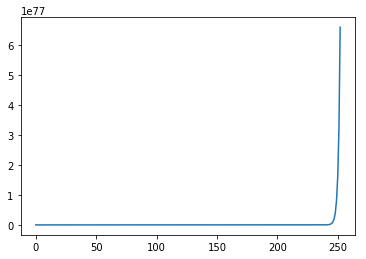

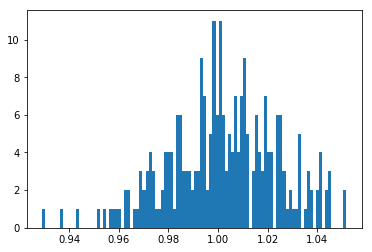

In [78]:
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100)
plt.show()

Monte Carlo simulation, this code ran a single simulation of potential price series evolution over a trading year (252), it looks kind of shitty, based upon a draw of random daily returns that follow a normal distribution. This is represented by the line series shown in the first graph. This is represented by the single line series shown in the first chart. The second chart plots a histogram of those random daily returns over the year period. 
Gratefully the chances of the price evolving in this trend is almost zero.
The value in simulation is running hundreds, thousands or tens of thousands of simulations. Each run produces a different series of potential price evolution based upon the same stock characteristics (mu and std). 



Let's make an adjustment to see multiple simulations. 